In [1]:
import profiles
import importlib
importlib.reload(profiles.utils)
import copy
import pickle

In [2]:
use_same_profile = 3
s, p = profiles.utils.prepare_profiles(use_same_profile)

Reading from matlab
number households: 55
number households: 69
converting to MW and getting peak power
scaling


# Curtailment losses without batteries

In [56]:
definitions = []
seed = 42
for grid in [1, 2, 3]:
    simbench_code = f'1-LV-rural{grid}--0-no_sw'
    for pv_ratio in [0.15, 0.3, 0.45]:
        definition = [simbench_code, pv_ratio, 1, 1, seed]
        definitions.append(definition)
        for curtailment_pu in [0.7, 0.5, 0.3]:
            for community_size in range(1, 11):
                definition = [simbench_code, pv_ratio, curtailment_pu, community_size, seed]
                definitions.append(definition)
        

In [78]:
results_no_bat = []
for definition in definitions:
    name = str(use_same_profile) + '__' + str(definition)[1:-1].replace(', ', '__').replace("'", '')
    definition = [copy.deepcopy(p+s)] + definition
    print('running:', name, end='')
    result = profiles.utils.prepare_experiment(*definition)
    losses_Wh, total_production_Wh = result[-2:]
    results_no_bat.append([name, losses_Wh, total_production_Wh])
    print('  |  ', losses_Wh, total_production_Wh)

running: 3__1-LV-rural1--0-no_sw__0.15__1__1__42  |   0 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42  |   309598.7432087154 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__2__42  |   106895.92365141652 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__3__42  |   81989.73221437936 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__4__42  |   68962.7520348586 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__5__42  |   60513.45270530158 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__6__42  |   60513.45270530158 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__7__42  |   60513.45270530158 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__8__42  |   60513.45270530158 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__9__42  |   60513.45270530158 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__10__42  |   60513.45270530158 13632294.3182

running: 3__1-LV-rural2--0-no_sw__0.45__0.3__3__42  |   41671104.964222915 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__4__42  |   35416610.19072077 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__5__42  |   32965924.154956326 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__6__42  |   32647106.326687098 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__7__42  |   29016272.549664836 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__8__42  |   28523471.53232485 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__9__42  |   25953586.661438867 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__10__42  |   25404804.780686796 300395165.7988616
running: 3__1-LV-rural3--0-no_sw__0.15__1__1__42  |   0 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.7__1__42  |   3342133.4704583953 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.7__2__42  |   1693277.9244017475 132399011.525

running: 3__1-LV-rural3--0-no_sw__0.45__0.5__9__42  |   10395072.696703019 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.5__10__42  |   10686984.175580297 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42  |   72345711.77781455 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__2__42  |   54165797.65465227 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__3__42  |   43387066.77838761 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__4__42  |   39027200.21159492 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__5__42  |   39708221.41545748 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__6__42  |   32933236.66864672 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__7__42  |   31210509.873298865 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__8__42  |   33536097.361666366 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__9__42  |   32080419.71520823 340045958.6

In [79]:
# save results if changes are desired in the plots at a later point
with open(f"../../results/losses_no_bat.pickle", "wb") as f:
    pickle.dump(results_no_bat, f)

In [80]:
with open(f"../../results/losses_no_bat.pickle", "rb") as f:
    results_no_bat = pickle.load(f)

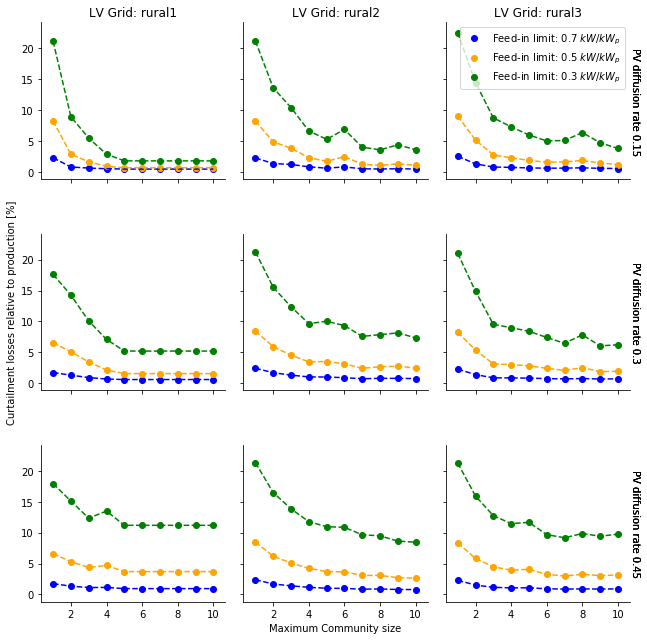

In [222]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3, figsize=(9, 9), facecolor='white', sharex=True, sharey=True)

seed = 42
i = 0
for grid in [1, 2, 3]:
    ax[0][grid-1].set_title(f"LV Grid: rural{grid}")
    for row, pv_ratio in enumerate([0.15, 0.3, 0.45]):
        ax[row][-1].text(
            1,
            0.5,
            f'PV diffusion rate {pv_ratio}',
            va='center',
            ha='left',
            rotation=270,
            transform=ax[row][-1].transAxes,
#             size=8,
            family='sans-serif',
        )
        
        # ignore that one... it's useless for the plotting
        i += 1
        for curtailment_pu, color in [(0.7, 'blue'), (0.5, 'orange'), (0.3, 'g')]:
            curve = []
            for community_size in range(1, 11):
                curve.append(100 * results_no_bat[i][1] / results_no_bat[i][-1])
                i += 1
            ax[row][grid-1].scatter(
                list(range(1, 11)), curve, label=r'Feed-in limit: {} $kW/kW_p$'.format(curtailment_pu), color=color
            )
            ax[row][grid-1].plot(list(range(1, 11)), curve, ls='dashed', color=color)
            ax[row][grid-1].spines['top'].set_visible(False)
            ax[row][grid-1].spines['right'].set_visible(False)
            
ax[0][2].legend()
ax[1][0].set_ylabel('Curtailment losses relative to production [%]')
ax[-1][1].set_xlabel("Maximum Community size")

plt.tight_layout()
# uncomment to save:
# fig.savefig('../results_no_bat.svg', format='svg')

# Community charachteristics

In [57]:
import simbench as sb
import numpy as np

def make_stats(grid, pv_rate, comm_size):
    np.random.seed(42)
    simbench_code = f'1-LV-rural{grid}--0-no_sw'
    net = sb.get_simbench_net(simbench_code)
    # distribute pv generators in net according to pv_ratio.
    sgen_bus_ids = profiles.utils.distribute_pv_sgens(net, pv_rate)
    # make communities with max community_size members
    # should be list of lists of bus ids
    # (with bus being the grid connection point of load/sgen)
    communities = profiles.utils.make_linear_communities(net, comm_size)
    # distribute profiles on network. Just map them by IDs. For loads and sgens
    # TODO: what about service
    profile_mapping = profiles.utils.map_profiles(net, copy.deepcopy(p+s))
    return profiles.utils.community_stat(communities, profile_mapping, sgen_bus_ids)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3, figsize=(9, 9), facecolor='white', sharex=True, sharey=True)

seed = 42
all_stats = []
for grid in [1, 2, 3]:
    print("GRID", grid)
    
    for row, pv_ratio in enumerate([0.15, 0.3, 0.45]):
        print("    PV RATIO", pv_ratio)
        for community_size in range(1, 11):
            print("        community_size", community_size)
            stats = make_stats(grid, pv_ratio, community_size)
            all_stats.append(stats)

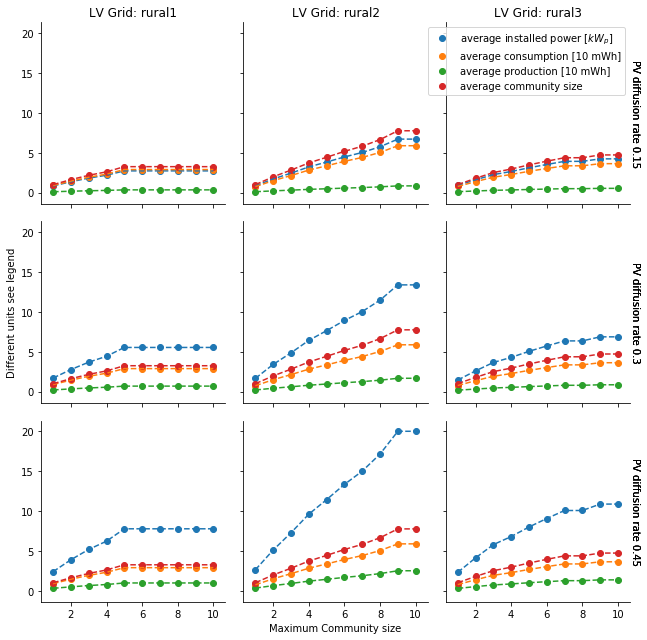

In [65]:

fig, ax = plt.subplots(3, 3, figsize=(9, 9), facecolor='white', sharex=True, sharey=True)
i = 0
for grid in [1, 2, 3]:
#     print("GRID", grid)
    ax[0][grid-1].set_title(f"LV Grid: rural{grid}")
    for row, pv_ratio in enumerate([0.15, 0.3, 0.45]):
#         print("    PV RATIO", pv_ratio)
        ax[row][-1].text(
            1,
            0.5,
            f'PV diffusion rate {pv_ratio}',
            va='center',
            ha='left',
            rotation=270,
            transform=ax[row][-1].transAxes,
#             size=8,
            family='sans-serif',
        )
        
        names = [
            "average installed power [$kW_p$]",
            "average consumption [10 mWh]",
            "average production [10 mWh]",
            "average community size"]
        curves = {name: [] for name in names} 
        for community_size in range(1, 11):
#             print("        community_size", community_size)
            stats = all_stats[i]
            for j, stat in enumerate(stats):
                if j in [1, 2]:
                    stat = stat / 1e7
                if j == 0:
                    stat = stat * 1e3
                curves[names[j]].append(stat)
            i += 1
        for name, curve in curves.items():
            ax[row][grid-1].scatter(list(range(1, 11)), curve, label=name)
            ax[row][grid-1].plot(list(range(1, 11)), curve, ls='dashed')
            ax[row][grid-1].spines['top'].set_visible(False)
            ax[row][grid-1].spines['right'].set_visible(False)

ax[0][2].legend()
ax[1][0].set_ylabel('Different units see legend')
ax[-1][1].set_xlabel("Maximum Community size")

plt.tight_layout()
# uncomment to save:
# fig.savefig('../../results/comm_stats.svg', format='svg')

# Curtailment losses using Batteries

## Self-Consumption-Orientated control strategy

In [67]:
battery_sizes = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

In [66]:
definitions = []
seed = 42
for grid in [1, 2, 3]:
    simbench_code = f'1-LV-rural{grid}--0-no_sw'
    for pv_ratio in [0.15, 0.3, 0.45]:
        for curtailment_pu in [0.7, 0.5, 0.3]:
            for community_size in [1, 10]:
                for battery_size in battery_sizes:
                    definition = [simbench_code, pv_ratio, curtailment_pu, community_size, seed, battery_size]
                    definitions.append(definition)

In [72]:
importlib.reload(profiles.utils)
results = []
for definition in definitions:
    name = str(use_same_profile) + '__' + str(definition)[1:-1].replace(', ', '__').replace("'", '')
    definition = [copy.deepcopy(p+s)] + definition
    print('running:', name, end='')
    result = profiles.utils.prepare_experiment(*definition)    
    losses_Wh, total_production_Wh = result[-2:]
    results.append([name, losses_Wh, total_production_Wh])
    print('  |  ', losses_Wh, total_production_Wh)

running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.05  |   (284093.3504069722, 74590.52140117012) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.1  |   (275721.795518374, 124124.54944771367) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.2  |   (268296.3953868018, 203013.11915053913) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.3  |   (263560.16516150266, 271108.2048147302) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.4  |   (259351.52048658408, 335133.1214204339) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.5  |   (253831.8398491203, 396140.7685797417) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.6  |   (248979.65176460656, 455285.9446434739) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.7  |   (244003.27319598093, 512283.2937282945) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.

running: 3__1-LV-rural1--0-no_sw__0.15__0.5__1__42__15  |   (643715.3937658033, 961224.5185041871) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.5__1__42__20  |   (634038.1367955783, 969821.8093486314) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.5__1__42__30  |   (617350.7299215542, 987016.3910375232) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.5__10__42__0.05  |   (71127.2165780686, 74590.52140117012) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.5__10__42__0.1  |   (64606.301580247266, 124124.54944771367) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.5__10__42__0.2  |   (59203.94512565372, 203013.11915053913) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.5__10__42__0.3  |   (56351.08223821727, 271108.2048147302) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.5__10__42__0.4  |   (53989.890506899406, 335133.1214204339) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.

running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__8  |   (129719.82823288553, 946949.0549159199) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__9  |   (129596.1415580856, 949138.3086403647) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__10  |   (129471.36489054738, 951327.562364809) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__15  |   (128491.23484842684, 961224.5185041871) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__20  |   (126683.6949018762, 969821.8093486314) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__30  |   (125006.44482199241, 987016.3910375232) 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.3__0.7__1__42__0.05  |   (420314.10189571604, 154248.83259299083) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.7__1__42__0.1  |   (397643.06639709603, 254513.7433085131) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.7__1__

running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__6  |   (771630.2241650785, 2027141.873287362) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__7  |   (762671.4154995054, 2038735.7230120483) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__8  |   (755528.871996417, 2047678.5267565039) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__9  |   (749599.8649014084, 2055192.4819828076) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__10  |   (744586.4580130752, 2061714.4734850288) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__15  |   (722956.9729458063, 2088223.9604807817) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__20  |   (702969.1299189363, 2108163.9179918906) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__30  |   (665094.7108157866, 2146410.531702967) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__10__42__0.05  |   (377964.2

running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__4  |   (211972.86710959204, 1988643.1191243653) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__5  |   (194357.58189786135, 2014043.2277512676) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__6  |   (177526.54583698107, 2027141.873287362) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__7  |   (170044.30797801033, 2038735.7230120483) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__8  |   (166525.683295625, 2047678.5267565039) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__9  |   (163347.7207249769, 2055192.4819828076) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__10  |   (160280.80837914004, 2061714.4734850288) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__15  |   (137225.52872649743, 2088223.9604807817) 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__20  | 

running: 3__1-LV-rural1--0-no_sw__0.45__0.3__10__42__0.8  |   (3071075.326076084, 1592026.1722225128) 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__10__42__0.9  |   (2883826.5518477405, 1725255.277179165) 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__10__42__1  |   (2684512.87025476, 1847918.4211066044) 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__10__42__1.5  |   (1827289.8746962275, 2312100.1521871756) 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__10__42__2  |   (1294695.1339617535, 2564877.7677351646) 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__10__42__3  |   (820221.2925766248, 2798742.2230671826) 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__10__42__4  |   (676270.0487758145, 2890333.3445705185) 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__10__42__5  |   (610845.9943838825, 2933148.484358407) 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__10__4

running: 3__1-LV-rural2--0-no_sw__0.15__0.5__1__42__0.5  |   (7885422.448104267, 2835528.2669376354) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.5__1__42__0.6  |   (7743416.653801371, 3260949.711654451) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.5__1__42__0.7  |   (7557849.766786459, 3662173.3772669537) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.5__1__42__0.8  |   (7339274.200947804, 4036989.105523216) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.5__1__42__0.9  |   (7108954.421662332, 4380454.6153547475) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.5__1__42__1  |   (6873307.022924676, 4689297.119459314) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.5__1__42__1.5  |   (5865925.098229283, 5784478.138454304) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.5__1__42__2  |   (5354724.33062881, 6322982.139725713) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.5__1__42

running: 3__1-LV-rural2--0-no_sw__0.15__0.3__10__42__0.2  |   (3212354.85846216, 1427113.210549161) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__10__42__0.3  |   (3157729.19500845, 1922339.3944154328) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__10__42__0.4  |   (3096880.740437023, 2390292.2144821393) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__10__42__0.5  |   (3032325.846441972, 2835528.2669376354) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__10__42__0.6  |   (2963443.828516218, 3260949.711654451) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__10__42__0.7  |   (2882263.072122822, 3662173.3772669537) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__10__42__0.8  |   (2791244.5322111594, 4036989.105523216) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__10__42__0.9  |   (2696175.9332808964, 4380454.6153547475) 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0

running: 3__1-LV-rural2--0-no_sw__0.3__0.7__10__42__30  |   (275241.0495107616, 15314779.6387191) 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__1__42__0.05  |   (16847972.22028315, 1046502.171057864) 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__1__42__0.1  |   (16637812.652504066, 1729471.2237848171) 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__1__42__0.2  |   (16408980.318016658, 2832158.3450744706) 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__1__42__0.3  |   (16227881.482482048, 3801986.352463101) 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__1__42__0.4  |   (16038833.594097529, 4715410.922973112) 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__1__42__0.5  |   (15824208.776629249, 5584039.555927869) 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__1__42__0.6  |   (15558795.374835756, 6413837.077274632) 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__1__4

running: 3__1-LV-rural2--0-no_sw__0.45__0.7__10__42__7  |   (444917.2478450356, 22047140.395428907) 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__10__42__8  |   (438908.4153265711, 22175521.447935507) 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__10__42__9  |   (438304.0026384047, 22280648.524582967) 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__10__42__10  |   (435738.54536875937, 22374255.4360463) 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__10__42__15  |   (422788.9659514754, 22722579.807935327) 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__10__42__20  |   (403856.69492104405, 22983703.851794615) 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__10__42__30  |   (398288.6873516401, 23440328.9043527) 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.5__1__42__0.05  |   (26908005.507473044, 1526393.7039185285) 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.5__1__42_

running: 3__1-LV-rural3--0-no_sw__0.15__0.7__10__42__1.5  |   (237908.683905586, 7951876.2529432895) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.7__10__42__2  |   (185032.17912843754, 8756013.498562397) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.7__10__42__3  |   (160409.835155937, 9382952.69569678) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.7__10__42__4  |   (157954.18499878747, 9657918.745291986) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.7__10__42__5  |   (155728.2877476439, 9809620.760670414) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.7__10__42__6  |   (155326.4620326254, 9909655.734382141) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.7__10__42__7  |   (154998.76915361307, 9975688.871751187) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.7__10__42__8  |   (154853.6256372732, 10026266.537166562) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.7__10__42_

running: 3__1-LV-rural3--0-no_sw__0.15__0.3__1__42__0.8  |   (23758357.44981616, 5326481.5540998895) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__1__42__0.9  |   (22713613.540867668, 5822023.279031699) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__1__42__1  |   (21721476.629648667, 6279793.08628294) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__1__42__1.5  |   (18011357.15004668, 7951876.2529432895) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__1__42__2  |   (16160017.516487798, 8756013.498562397) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__1__42__3  |   (14747320.249877984, 9382952.69569678) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__1__42__4  |   (14160608.680536145, 9657918.745291986) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__1__42__5  |   (13829409.836104654, 9809620.760670414) 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__1__42__

running: 3__1-LV-rural3--0-no_sw__0.3__0.7__10__42__0.5  |   (828543.3864791887, 6077220.618791727) 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.7__10__42__0.6  |   (810434.3904840373, 6983121.2493787855) 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.7__10__42__0.7  |   (787471.5570859003, 7848438.676276975) 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.7__10__42__0.8  |   (762098.5742248801, 8665888.305723567) 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.7__10__42__0.9  |   (736437.7336626092, 9431163.503349701) 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.7__10__42__1  |   (703905.5753074229, 10137737.161314199) 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.7__10__42__1.5  |   (526554.0046216664, 12756415.974278467) 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.7__10__42__2  |   (430970.5475324672, 14106181.675714137) 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.7__10__

running: 3__1-LV-rural3--0-no_sw__0.45__0.7__10__42__0.05  |   (2525583.0826288634, 1792525.6878230872) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.7__10__42__0.1  |   (2292857.8759813756, 2963327.6407452463) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.7__10__42__0.2  |   (2088594.359104332, 4860465.917374892) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.7__10__42__0.3  |   (1977082.508359858, 6538956.583406572) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.7__10__42__0.4  |   (1903256.0998882402, 8116347.568914948) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.7__10__42__0.5  |   (1848861.944806877, 9621903.65578531) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.7__10__42__0.6  |   (1798784.4410701226, 11062686.98701701) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.7__10__42__0.7  |   (1744489.9470666253, 12430160.972871847) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.7__10_

running: 3__1-LV-rural3--0-no_sw__0.45__0.5__10__42__20  |   (3058091.0292458357, 25666371.895523183) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.5__10__42__30  |   (2959089.2799235093, 26160712.45512023) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.05  |   (70966476.30134031, 1792525.6878230872) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.1  |   (70284245.06845286, 2963327.6407452463) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.2  |   (69152697.4872986, 4860465.917374892) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.3  |   (67777164.9634205, 6538956.583406572) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.4  |   (66022455.191497535, 8116347.568914948) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.5  |   (63947288.19679583, 9621903.65578531) 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.6  |  

In [133]:
# save results if changes are desired in the plots at a later point
with open(f"../../results/losses_self_con.pickle", "wb") as f:
    pickle.dump(results_ineff, f)

In [12]:
with open(f"../../results/losses_self_con.pickle", "rb") as f:
    results_ineff = pickle.load(f)


Grid 1
PV RATIO 0.15
1 0
Feed-in limit: 0.7 $kW/kW_p$ 1.494113547862376
1 0
Feed-in limit: 0.5 $kW/kW_p$ 6.163919725124227
1 0
Feed-in limit: 0.3 $kW/kW_p$ 13.728550610607492
PV RATIO 0.3
1 0
Feed-in limit: 0.7 $kW/kW_p$ 0.8945015082806854
1 0
Feed-in limit: 0.5 $kW/kW_p$ 3.920325583077091
1 0
Feed-in limit: 0.3 $kW/kW_p$ 8.447830851564232
PV RATIO 0.45
1 0
Feed-in limit: 0.7 $kW/kW_p$ 0.7031701215080308
1 0
Feed-in limit: 0.5 $kW/kW_p$ 2.6725456452996665
1 0
Feed-in limit: 0.3 $kW/kW_p$ 5.200110709773915

Grid 2
PV RATIO 0.15
1 0
Feed-in limit: 0.7 $kW/kW_p$ 1.5292042269549542
1 0
Feed-in limit: 0.5 $kW/kW_p$ 6.182134810319559
1 0
Feed-in limit: 0.3 $kW/kW_p$ 13.475994182259555
PV RATIO 0.3
1 0
Feed-in limit: 0.7 $kW/kW_p$ 1.4909690845790098
1 0
Feed-in limit: 0.5 $kW/kW_p$ 5.251099237003307
1 0
Feed-in limit: 0.3 $kW/kW_p$ 10.60179055543031
PV RATIO 0.45
1 0
Feed-in limit: 0.7 $kW/kW_p$ 1.5857290304944331
1 0
Feed-in limit: 0.5 $kW/kW_p$ 5.675774843738063
1 0
Feed-in limit: 0.3 $kW/

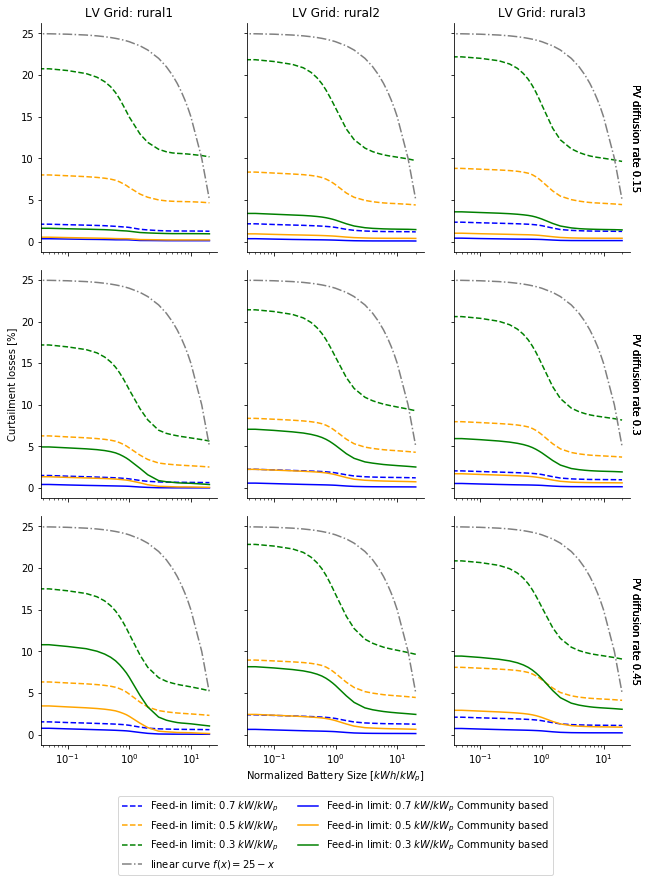

In [76]:
importlib.reload(profiles.utils)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
fig, ax = plt.subplots(3, 3, figsize=(9, 12), facecolor='white', sharex=True, sharey=True)
i = 0
all_reductions = []
size_reduction = []
for grid in [1, 2, 3]:
    simbench_code = f'1-LV-rural{grid}--0-no_sw'
    ax[0][grid-1].set_title(f"LV Grid: rural{grid}")
    print()
    print('Grid', grid)
    for row, pv_ratio in enumerate([0.15, 0.3, 0.45]):
        ax[row][-1].text(
            1,
            0.5,
            f'PV diffusion rate {pv_ratio}',
            va='center',
            ha='left',
            rotation=270,
            transform=ax[row][-1].transAxes,
            family='sans-serif',
        )
        curves = [[[]] for x in range(6)]
        j = 0
        # #0079B1
        print('PV RATIO', pv_ratio)
        for curtailment_pu, color in [(0.7, 'blue'), (0.5, 'orange'), (0.3, 'g')]:
            for community_size, marker in [(1, '--'), (10, '-')]:
                iscomm_based = '' if community_size == 1 else ' Community based'
                curves[j] += [r'Feed-in limit: {} $kW/kW_p${}'.format(curtailment_pu, iscomm_based), marker, color]
                for battery_size in battery_sizes:
                    definition = [simbench_code, pv_ratio, curtailment_pu, community_size, seed, battery_size]
                    name_ex = str(use_same_profile) + '__' + str(definition)[1:-1].replace(', ', '__').replace("'", '')
                    name, (curtailment_losses_Wh, battery_losses_Wh), total_production_Wh = results_ineff[i]
                    assert name_ex == name
                    curves[j][0].append(100 * curtailment_losses_Wh / total_production_Wh)
                    i += 1
                j += 1
            reduction = curves[j-2][0][11] - curves[j-1][0][11]
            all_reductions.append(reduction)
            for k, loss in enumerate(curves[j-1][0]):
                if loss < curves[j-2][0][11]:
                    size_reduction.append(1 - battery_sizes[k])
                    print(battery_sizes[11], battery_sizes[k])
                    break
            print(curves[j-2][1], reduction)
        import numpy as np
        curves.append([[25-x for x in battery_sizes], 'linear curve $f(x)=25-x$', '-.', 'grey'])
        curves = np.array(curves)
        curves = curves[[0, 2, 4, 6, 1, 3, 5]]
        for curve, name, marker, color in curves:
            ax[row][grid-1].plot(battery_sizes[:24], curve[:24], ls=marker, color=color, label=name)
            ax[row][grid-1].spines['top'].set_visible(False)
            ax[row][grid-1].spines['right'].set_visible(False)
            

ax[2][1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

ax[1][0].set_ylabel('Curtailment losses [%]')
ax[-1][1].set_xlabel("Normalized Battery Size [$kWh/kW_p$]")
plt.tight_layout(rect=[0,0.08,1,1])
plt.xscale('log')
# uncomment to save:
# fig.savefig('../../results/losses_self_con.svg', format='svg')

## Prediction based

In [104]:
definitions = []
seed = 42
for grid in [1, 2, 3]:
    simbench_code = f'1-LV-rural{grid}--0-no_sw'
    for pv_ratio in [0.15, 0.3, 0.45]:
        for curtailment_pu in [0.7, 0.5, 0.3]:
            for community_size in [1, 10]:
                for battery_size in battery_sizes:
                    definition = [simbench_code, pv_ratio, curtailment_pu, community_size, seed, battery_size, True]
                    definitions.append(definition)

In [106]:
results_predic = []
for definition in definitions:
    name = str(use_same_profile) + '__' + str(definition)[1:-1].replace(', ', '__').replace("'", '')
    definition = [copy.deepcopy(p+s)] + definition
    print('running:', name, end='')
    result = profiles.utils.prepare_experiment(*definition)    
    losses_Wh, total_production_Wh = result[-2:]
    results_predic.append([name, losses_Wh, total_production_Wh])
    print('  |  ', losses_Wh, total_production_Wh)

running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0__True  |   [309598.7432087154, 0.0] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.05__True  |   [219277.27190355925, 154917.49112920518] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.1__True  |   [167059.44633277276, 262641.032162777] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.2__True  |   [106523.89995177972, 399504.19222898915] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.3__True  |   [71889.36995613688, 486407.60827654594] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.4__True  |   [52520.44929324641, 554264.4717550812] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.5__True  |   [39983.24955700816, 616240.9498169182] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.7__1__42__0.6__True  |   [29868.554115904277, 670862.7657029859] 13632294.318297755
running: 

running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__1.5__True  |   [60635.79223249765, 963228.9296891028] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__2__True  |   [42252.2061199141, 1028948.156438978] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__3__True  |   [28307.94691270557, 1083705.9582890177] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__4__True  |   [12981.580817099395, 1106020.1677656658] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__5__True  |   [4708.338729411823, 1115008.7513974474] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__6__True  |   [2613.5140810457974, 1122214.009658335] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__7__True  |   [2337.8003991285736, 1126729.0378014424] 13632294.318297755
running: 3__1-LV-rural1--0-no_sw__0.15__0.3__10__42__8__True  |   [2241.021344371852, 1131188.2427042364] 13632294.318297755

running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__0.6__True  |   [330224.7763242348, 1295790.600893833] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__0.7__True  |   [242513.0176587868, 1403552.437250379] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__0.8__True  |   [174092.2177732599, 1508279.0016836205] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__0.9__True  |   [122107.89379255398, 1595749.732125299] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__1__True  |   [81508.95055771692, 1668146.9153726464] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__1.5__True  |   [13952.867845324961, 1918384.7990889994] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__2__True  |   [2994.433088607418, 2041955.1448629578] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.5__1__42__3__True  |   [0.0, 2164661.436130657] 27758255.93049819
running: 3__1-LV-rural1--0-no_

running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__0.1__True  |   [1243850.6717566703, 357468.9866750081] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__0.2__True  |   [1084938.9885433505, 576824.2174371056] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__0.3__True  |   [946340.6660354183, 756066.8302774241] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__0.4__True  |   [828015.4712282645, 913070.6580752123] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__0.5__True  |   [714619.9561716268, 1055388.6003031028] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__0.6__True  |   [614022.6781892742, 1182810.1561827897] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__0.7__True  |   [516074.25110777037, 1306435.0267348208] 27758255.93049819
running: 3__1-LV-rural1--0-no_sw__0.3__0.3__10__42__0.8__True  |   [429321.972652592, 1416547.7670768655] 27758255.93049819
ru

running: 3__1-LV-rural1--0-no_sw__0.45__0.7__10__42__10__True  |   [0.0, 3234530.581006083] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.7__10__42__15__True  |   [0.0, 3270536.907378346] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.7__10__42__20__True  |   [0.0, 3295247.437740265] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.7__10__42__30__True  |   [0.0, 3332618.5390796755] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.5__1__42__0__True  |   [2566732.8753507757, 0.0] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.5__1__42__0.05__True  |   [2147392.838286982, 369298.20052653766] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.5__1__42__0.1__True  |   [1855547.238583636, 634497.2829716796] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.5__1__42__0.2__True  |   [1419128.007062381, 991150.7581529632] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.5__1__42__0.3__True  |   [1082627.

running: 3__1-LV-rural1--0-no_sw__0.45__0.3__1__42__4__True  |   [219074.87690212962, 3219944.814684039] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__1__42__5__True  |   [161048.85989778469, 3253332.746320371] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__1__42__6__True  |   [119449.33788984126, 3278213.4208825836] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__1__42__7__True  |   [87989.70334343598, 3294548.603477685] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__1__42__8__True  |   [59117.52556565808, 3307052.530942639] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__1__42__9__True  |   [33450.48949158403, 3317966.9939194876] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__1__42__10__True  |   [10417.085047139528, 3326851.823764605] 38885426.16861593
running: 3__1-LV-rural1--0-no_sw__0.45__0.3__1__42__15__True  |   [0.0, 3357360.605911709] 38885426.16861593
running: 3__1-LV-rural1--0-no_

running: 3__1-LV-rural2--0-no_sw__0.15__0.3__1__42__0.1__True  |   [19376485.94158001, 1279944.6855071767] 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__1__42__0.2__True  |   [17207671.593639944, 2066162.6889406573] 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__1__42__0.3__True  |   [15346894.420977553, 2731409.7041766737] 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__1__42__0.4__True  |   [13696197.08986594, 3331245.6309720455] 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__1__42__0.5__True  |   [12240748.368278505, 3873143.318928017] 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__1__42__0.6__True  |   [10943943.3388531, 4364002.777703034] 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__1__42__0.7__True  |   [9771263.526949387, 4814789.552959062] 100733574.72387536
running: 3__1-LV-rural2--0-no_sw__0.15__0.3__1__42__0.8__True  |   [8711339.958094371, 5222230.491265915] 100733574.723

running: 3__1-LV-rural2--0-no_sw__0.3__0.5__10__42__1.5__True  |   [153227.409516997, 14279342.982997099] 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__10__42__2__True  |   [76030.94285502368, 15142203.573680112] 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__10__42__3__True  |   [38125.43004666249, 15853765.505314281] 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__10__42__4__True  |   [18990.83263311489, 16171634.540457912] 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__10__42__5__True  |   [4488.828284815119, 16358064.497034594] 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__10__42__6__True  |   [1115.0506625350974, 16470864.130909124] 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__10__42__7__True  |   [32.29412313704699, 16561222.933505151] 201153292.62123513
running: 3__1-LV-rural2--0-no_sw__0.3__0.5__10__42__8__True  |   [0.0, 16626948.653237468] 201153292.62123513
running: 3__1-LV-rur

running: 3__1-LV-rural2--0-no_sw__0.45__0.7__1__42__0.3__True  |   [2073223.1788217728, 10258228.06748677] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__1__42__0.4__True  |   [1508292.3945888088, 11724277.310872223] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__1__42__0.5__True  |   [1121220.2180262108, 13205207.469992159] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__1__42__0.6__True  |   [852406.364106847, 14380939.382817205] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__1__42__0.7__True  |   [663910.2630763187, 15499894.289389292] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__1__42__0.8__True  |   [521959.11840706953, 16478312.072577445] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__1__42__0.9__True  |   [413046.6673982204, 17402139.13736674] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.7__1__42__1__True  |   [334216.39084721374, 18164696.75260774] 300395165.7988616
r

running: 3__1-LV-rural2--0-no_sw__0.45__0.5__1__42__20__True  |   [0.0, 25890112.622006234] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.5__1__42__30__True  |   [0.0, 26214296.603192884] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.5__10__42__0__True  |   [7924944.239105325, 0.0] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.5__10__42__0.05__True  |   [6915390.214295519, 2639270.068319962] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.5__10__42__0.1__True  |   [6041922.2066893615, 4579792.230588415] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.5__10__42__0.2__True  |   [4687106.808416226, 7326473.209228879] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.5__10__42__0.3__True  |   [3630666.663711126, 9293732.053251332] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.5__10__42__0.4__True  |   [2812149.504536809, 11154712.110503953] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.5

running: 3__1-LV-rural2--0-no_sw__0.45__0.3__10__42__4__True  |   [1394762.0404560352, 24431090.551305886] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__10__42__5__True  |   [1219226.6028659206, 24749782.789380524] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__10__42__6__True  |   [1083809.9483201876, 24964541.228770588] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__10__42__7__True  |   [999147.480867037, 25115906.3037633] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__10__42__8__True  |   [939929.4500138065, 25228848.483147725] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__10__42__9__True  |   [889049.9818937932, 25322569.460601144] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__10__42__10__True  |   [849654.6578245794, 25404274.61103991] 300395165.7988616
running: 3__1-LV-rural2--0-no_sw__0.45__0.3__10__42__15__True  |   [734712.5376276907, 25714034.349194467] 300395165.7988616
running

running: 3__1-LV-rural3--0-no_sw__0.15__0.3__10__42__0__True  |   [4997937.423131175, 0.0] 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__10__42__0.05__True  |   [4701274.711338119, 925992.4238150006] 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__10__42__0.1__True  |   [4456752.961813713, 1628833.6835565374] 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__10__42__0.2__True  |   [4006786.167110039, 2645091.9895028854] 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__10__42__0.3__True  |   [3613595.44526397, 3519986.4061681796] 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__10__42__0.4__True  |   [3242413.0922101676, 4317803.794835839] 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__10__42__0.5__True  |   [2883994.473053259, 5041758.369726908] 132399011.52583335
running: 3__1-LV-rural3--0-no_sw__0.15__0.3__10__42__0.6__True  |   [2550721.312352967, 5717088.061709569] 132399011.52583335
runn

running: 3__1-LV-rural3--0-no_sw__0.3__0.3__1__42__1__True  |   [13821739.165717013, 12690450.523885382] 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.3__1__42__1.5__True  |   [8122871.173325868, 15348044.251782037] 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.3__1__42__2__True  |   [5827720.971149412, 16604993.814134121] 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.3__1__42__3__True  |   [4162814.960963083, 17584650.776175383] 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.3__1__42__4__True  |   [3474676.609065608, 17970610.663217478] 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.3__1__42__5__True  |   [3066563.62133548, 18171868.483176723] 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.3__1__42__6__True  |   [2774205.5098951687, 18307837.24789339] 215139517.41601217
running: 3__1-LV-rural3--0-no_sw__0.3__0.3__1__42__7__True  |   [2562836.66628098, 18399414.73319816] 215139517.41601217
running: 3__1-LV

running: 3__1-LV-rural3--0-no_sw__0.45__0.5__10__42__15__True  |   [0.0, 28986615.95501162] 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.5__10__42__20__True  |   [0.0, 29171578.705118835] 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.5__10__42__30__True  |   [0.0, 29515328.317045104] 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0__True  |   [72345711.77781455, 0.0] 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.05__True  |   [66804577.11872858, 2477038.971265018] 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.1__True  |   [62634109.00242163, 4329623.603679949] 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.2__True  |   [55739889.080365665, 7002304.630599243] 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.3__True  |   [49825792.796048075, 9239828.396559123] 340045958.608135
running: 3__1-LV-rural3--0-no_sw__0.45__0.3__1__42__0.4__True  |   [4

In [107]:
# save results if changes are desired in the plots at a later point
with open(f"../../results/losses_with_battery_predic.pickle", "wb") as f:
    pickle.dump(results_predic, f)

In [3]:
with open(f"../../results/losses_with_battery_predic.pickle", "rb") as f:
    results_predic = pickle.load(f)

Feed-in limit: 0.7 $kW/kW_p$ 0.04042209259664348
Feed-in limit: 0.5 $kW/kW_p$ 0.8244110425083906
Feed-in limit: 0.3 $kW/kW_p$ 6.9564105837607695
Feed-in limit: 0.7 $kW/kW_p$ 0.02070493938722165
Feed-in limit: 0.5 $kW/kW_p$ 0.44039562541850374
Feed-in limit: 0.3 $kW/kW_p$ 4.122816967230243
Feed-in limit: 0.7 $kW/kW_p$ 0.03481548113663921
Feed-in limit: 0.5 $kW/kW_p$ 0.40197605624952115
Feed-in limit: 0.3 $kW/kW_p$ 2.456445286824287
Feed-in limit: 0.7 $kW/kW_p$ 0.07382510814429685
Feed-in limit: 0.5 $kW/kW_p$ 1.0752986324328087
Feed-in limit: 0.3 $kW/kW_p$ 7.199201466458133
Feed-in limit: 0.7 $kW/kW_p$ 0.08929741399729878
Feed-in limit: 0.5 $kW/kW_p$ 1.095614852573602
Feed-in limit: 0.3 $kW/kW_p$ 5.979267455302108
Feed-in limit: 0.7 $kW/kW_p$ 0.09426347571340397
Feed-in limit: 0.5 $kW/kW_p$ 1.1575677975507952
Feed-in limit: 0.3 $kW/kW_p$ 6.347733337941115
Feed-in limit: 0.7 $kW/kW_p$ 0.09853602423352796
Feed-in limit: 0.5 $kW/kW_p$ 1.283867975691519
Feed-in limit: 0.3 $kW/kW_p$ 7.8508973

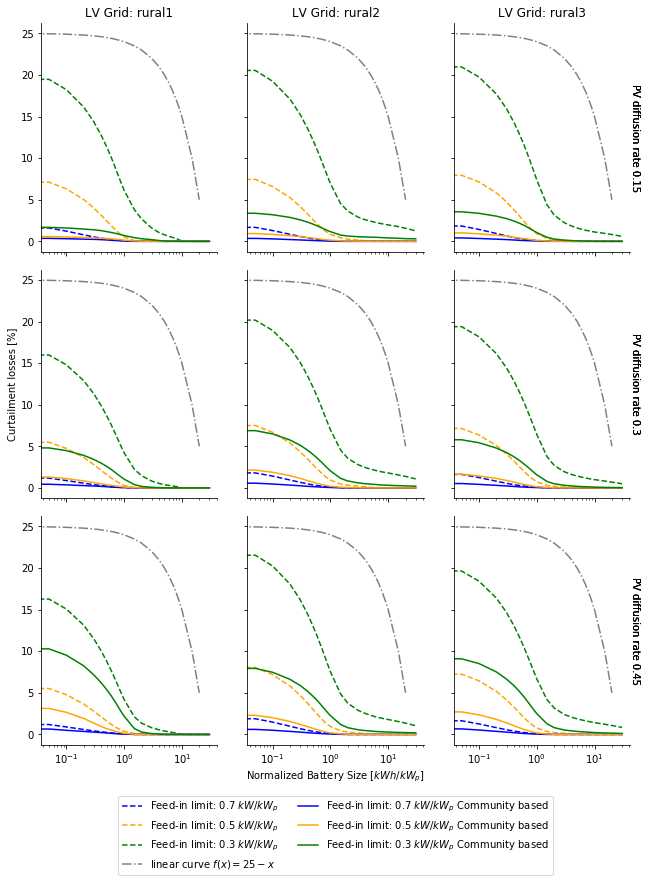

In [108]:
importlib.reload(profiles.utils)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
fig, ax = plt.subplots(3, 3, figsize=(9, 12), facecolor='white', sharex=True, sharey=True)
i = 0
all_reductions_predic = []
size_reduction_predic = []
for grid in [1, 2, 3]:
    simbench_code = f'1-LV-rural{grid}--0-no_sw'
    ax[0][grid-1].set_title(f"LV Grid: rural{grid}")
    for row, pv_ratio in enumerate([0.15, 0.3, 0.45]):
        ax[row][-1].text(
            1,
            0.5,
            f'PV diffusion rate {pv_ratio}',
            va='center',
            ha='left',
            rotation=270,
            transform=ax[row][-1].transAxes,
            family='sans-serif',
        )
        curves = [[[]] for x in range(6)]
        j = 0
        for curtailment_pu, color in [(0.7, 'blue'), (0.5, 'orange'), (0.3, 'g')]:
            for community_size, marker in [(1, '--'), (10, '-')]:
                iscomm_based = '' if community_size == 1 else ' Community based'
                curves[j] += [r'Feed-in limit: {} $kW/kW_p${}'.format(curtailment_pu, iscomm_based), marker, color]
                for battery_size in battery_sizes:
                    definition = [simbench_code, pv_ratio, curtailment_pu, community_size, seed, battery_size, True]
                    name_ex = str(use_same_profile) + '__' + str(definition)[1:-1].replace(', ', '__').replace("'", '')
                    name, (curtailment_losses_Wh, battery_losses_Wh), total_production_Wh = results_predic[i]
                    assert name_ex == name
                    curves[j][0].append(100 * curtailment_losses_Wh / total_production_Wh)
                    i += 1
                j += 1
            reduction = curves[j-2][0][9] - curves[j-1][0][9]
            all_reductions_predic.append(reduction)
            for k, loss in enumerate(curves[j-1][0]):
                if loss < curves[j-2][0][9]:
                    size_reduction_predic.append(0.8 - battery_sizes[k])
                    break
            print(curves[j-2][1], reduction)
            
        import numpy as np
        curves.append([[25-x for x in battery_sizes[:-1]] + [None], 'linear curve $f(x)=25-x$', '-.', 'grey'])
        curves = np.array(curves)
        curves = curves[[0, 2, 4, 6, 1, 3, 5]]
        for curve, name, marker, color in curves:
            ax[row][grid-1].plot(battery_sizes, curve, ls=marker, color=color, label=name)
            ax[row][grid-1].spines['top'].set_visible(False)
            ax[row][grid-1].spines['right'].set_visible(False)
            

ax[2][1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

ax[1][0].set_ylabel('Curtailment losses [%]')
ax[-1][1].set_xlabel("Normalized Battery Size [$kWh/kW_p$]")
plt.tight_layout(rect=[0,0.08,1,1])
plt.xscale('log')
# uncomment to save:
# fig.savefig('../../results/losses_bat_predict_lin_comp.svg', format='svg')

## Reduction visualization

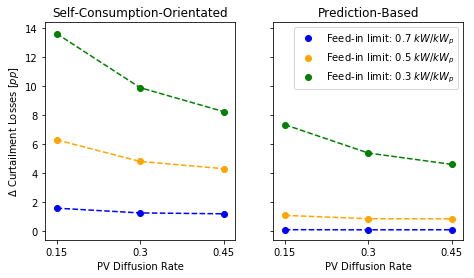

In [126]:
importlib.reload(profiles.utils)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
fig, ax = plt.subplots(1, 2, figsize=(7.5, 4), facecolor='white', sharey=True)
i = 0
all_reductions_avg = [sum(x) / 3 for x in zip(all_reductions[:9], all_reductions[9:18], all_reductions[18:])]
all_reductions_avg_predic = [sum(x) / 3 for x in zip(all_reductions_predic[:9], all_reductions_predic[9:18], all_reductions_predic[18:])]
for x, color, limit in [(0,'blue', 0.7), (1, 'orange', 0.5), (2, 'g', 0.3)]:
    label = str(r'Feed-in limit: {} $kW/kW_p$'.format(limit))
    ax[0].scatter([1,2,3], [all_reductions_avg[0+x], all_reductions_avg[3+x], all_reductions_avg[6+x]], color=color)
    ax[0].plot([1,2,3], [all_reductions_avg[0+x], all_reductions_avg[3+x], all_reductions_avg[6+x]], ls='--', color=color)
    ax[1].scatter([1,2,3], [all_reductions_avg_predic[0+x], all_reductions_avg_predic[3+x], all_reductions_avg_predic[6+x]], color=color, label=label)
    ax[1].plot([1,2,3], [all_reductions_avg_predic[0+x], all_reductions_avg_predic[3+x], all_reductions_avg_predic[6+x]], ls='--', color=color)
ax[0].set_ylabel('$\Delta$ Curtailment Losses [$pp$]')
ax[0].set_xlabel('PV Diffusion Rate')
ax[1].set_xlabel('PV Diffusion Rate')
ax[0].set_title('Self-Consumption-Orientated')
ax[1].set_title('Prediction-Based')
plt.setp(ax, xticks=[1,2,3], xticklabels=['0.15', '0.3', '0.45'])

ax[1].legend()
fig.savefig('../../results/delta_loss_1_kwh_kwp_both.svg', format='svg')

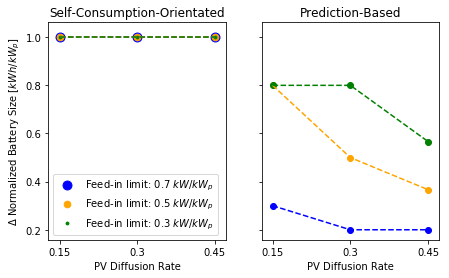

In [125]:

fig, ax = plt.subplots(1, 2, figsize=(7, 4), facecolor='white', sharey=True)
i = 0
size_reductions_avg = [sum(x) / 3 for x in zip(size_reduction[:9], size_reduction[9:18], size_reduction[18:])]
size_reductions_avg_predic = [sum(x) / 3 for x in zip(size_reduction_predic[:9], size_reduction_predic[9:18], size_reduction_predic[18:])]
for x, color, limit in [(0,'blue', 0.7), (1, 'orange', 0.5), (2, 'g', 0.3)]:
    label = str(r'Feed-in limit: {} $kW/kW_p$'.format(limit))
    ax[0].scatter([1,2,3], [size_reductions_avg[0+x], size_reductions_avg[3+x], size_reductions_avg[6+x]], color=color, label=label, s=80-36*x)
    ax[0].plot([1,2,3], [size_reductions_avg[0+x], size_reductions_avg[3+x], size_reductions_avg[6+x]], ls='--', color=color)
    ax[1].scatter([1,2,3], [size_reductions_avg_predic[0+x], size_reductions_avg_predic[3+x], size_reductions_avg_predic[6+x]], color=color)
    ax[1].plot([1,2,3], [size_reductions_avg_predic[0+x], size_reductions_avg_predic[3+x], size_reductions_avg_predic[6+x]], ls='--', color=color)
ax[0].set_ylabel('$\Delta$ Normalized Battery Size [$kWh/kW_p$]')
ax[0].set_xlabel('PV Diffusion Rate')
ax[1].set_xlabel('PV Diffusion Rate')
ax[0].set_title('Self-Consumption-Orientated')
ax[1].set_title('Prediction-Based')
plt.setp(ax, xticks=[1,2,3], xticklabels=['0.15', '0.3', '0.45'])
ax[0].legend()
fig.savefig('../../results/delta_bat_1_kwh_kwp_both_0.8_ol.svg', format='svg')

# 0.998 Quantile vizualization

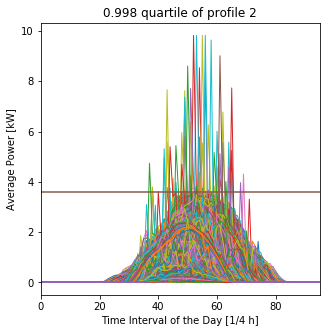

In [132]:
i = 2
fig, ax = plt.subplots(figsize=(5,5))
fig.set_facecolor('white')
x = p[i]['meter_records']['p_mw_sgen']
q_998 = x.quantile(0.998) * 1e3
# x = x.clip(0, x.quantile(0.998))
n_quarter_hours_per_day = 24 * 4
for day in range(365):
    kW = x[day*n_quarter_hours_per_day:(day + 1 )*n_quarter_hours_per_day] * 1e3
    kW.plot(ax=ax, use_index=False, linewidth=1)
ax.plot([q_998] * n_quarter_hours_per_day)
ax.set_title(f"0.998 quartile of profile {i}")
ax.set_ylabel("Average Power [kW]")
ax.set_xlabel("Time Interval of the Day [1/4 h]")
# fig.savefig('/home/you/path/p.svg', format='svg')